# Comparing the outputs of AlphaFold2 to the ground truth structure of EL222 protein  

This notebook is a part of the ML4Science project of the Girl MSE team: Elena Mrdja, Marija Zelic and Sara Zatezalo.



### Placing the predictions in their respective folders

In order to run the comparison the .pdb files containing the structure predictions outputed by AlphaFold model, we have to place them in a folder with a same name, to be consistent with the functions provided in the script 'run_comparisson_for_AF-cluster_modified.py'.


In [1]:
import os
import shutil

def organize_files(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Get a list of all files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Create subfolders for each file and move files into respective subfolders
    for file_name in files:
        file_path = os.path.join(folder_path, file_name)
        subfolder_path = os.path.join(folder_path, os.path.splitext(file_name)[0])
        
        # Create subfolder if it doesn't exist
        if  ~os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
        
        # Move file into subfolder
        try:
            shutil.move(file_path, os.path.join(subfolder_path, file_name))
            print(f"Moved '{file_name}' to '{subfolder_path}'")
        except Exception as e:
            print(f"Failed to move '{file_name}': {e}")

# Example usage:
folder_path = '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2'
#folder_path = '/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/output'
organize_files(folder_path)


FileExistsError: [Errno 17] File exists: '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/.DS_Store'

### Removing the extra files from respective folders
While computing the RMSDs in the following cells, the code creates additional .pdb files, so to clear the folders from any auxiliary files, run the following cell.

In [1]:
import os
    
def remove_unmatched_files(folder_path):
    # Check if the folder path exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Iterate through each subfolder
    for root, dirs, files in os.walk(folder_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            
            # Get list of files in the subfolder
            subfolder_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
            
            # Remove files not matching subfolder name
            for file_name in subfolder_files:
                if file_name != f"{dir_name}.pdb":
                    file_path = os.path.join(dir_path, file_name)
                    try:
                        os.remove(file_path)
                        print(f"Removed '{file_name}' from '{dir_path}'")
                    except Exception as e:
                        print(f"Failed to remove '{file_name}' from '{dir_path}': {e}")

# Example usage:
folder_path = '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2'
#folder_path = '/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/output'
remove_unmatched_files(folder_path)


Removed 'EX_051_sorted_sorted-aligned.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051'
Removed 'EX_051_sorted_sorted.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051'
Removed 'EX_051_sorted-aligned.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051'
Removed 'EX_051_sorted.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051'
Removed 'EX_056_sorted-aligned.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_056'
Removed 'EX_056_sorted.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_056'
Removed 'EX_069_sorted-aligned.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_069'
Removed 'EX_069_sorted.pdb' from '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_069'
Removed 'E

### Running the RMSD computation for the whole protein

The ground-truth sequence of EL222 protein (OFF conformation) we are using - "EL222_chain_A.pdb" comes from the following "UniProt database": https://www.uniprot.org/uniprotkb/Q2NB98/entry. 
Refer to the "run_comparisson_for_AF_cluster_modified.py" file for implementation and further details.  

Some of the residues from the chain are excluded as they are considered to be unresolved in the original chain, as stated in: https://www.rcsb.org/3d-view/3P7N.


In [2]:
from run_comparisson_for_AF_cluster_modified import *

parent_folder_path = '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2'
original_pdb_file = "/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A.pdb"
#parent_folder_path = '/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/output'
#original_pdb_file = "/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb"
choose_contigs = "with low-confidenceLOV" # "without low-confidenceLOV", "whole_protein"
list_scores, list_matched_ids, list_rmsd, list_sequences, cluster_ids = run_alignments_on_subfolders(parent_folder_path, original_pdb_file, choose_contigs, None)

/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_051_sorted.pdb
RMSD: 3.931
Mean confindence AF: 78.759
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_056
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_056_sorted.pdb
RMSD: 3.737
Mean confindence AF: 88.083
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_069
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_069_sorted.pdb
RMSD: 4.844
Mean confindence AF: 80.602
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_060
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPF

### Extracting only the clusters that have the overall confidence score over 80%

[88.0827067669173, 80.6015037593985, 88.27067669172932, 81.09022556390977, 80.54887218045113, 80.93984962406014, 85.36842105263158, 82.59398496240601, 89.0375939849624, 82.64661654135338, 80.06015037593986, 84.81203007518798, 80.65413533834587, 84.54887218045113, 81.54135338345864, 83.6842105263158, 81.54887218045113, 80.203007518797, 82.12781954887218, 81.10526315789474, 81.77443609022556, 82.46616541353383, 81.92481203007519, 82.52631578947368, 80.01503759398496, 82.25563909774436, 80.84210526315789, 82.54135338345864, 80.47368421052632, 83.93233082706767, 82.16541353383458, 80.61654135338345, 89.81203007518798, 87.34586466165413, 80.55639097744361, 84.37593984962406, 81.48872180451127, 82.07518796992481, 80.03007518796993, 80.99248120300751, 87.99248120300751, 80.29323308270676, 88.45864661654136, 80.94736842105263, 83.16541353383458, 89.64661654135338, 83.9624060150376, 85.14285714285714, 81.90225563909775, 83.41353383458646, 81.85714285714286, 82.33082706766918, 85.51127819548873,

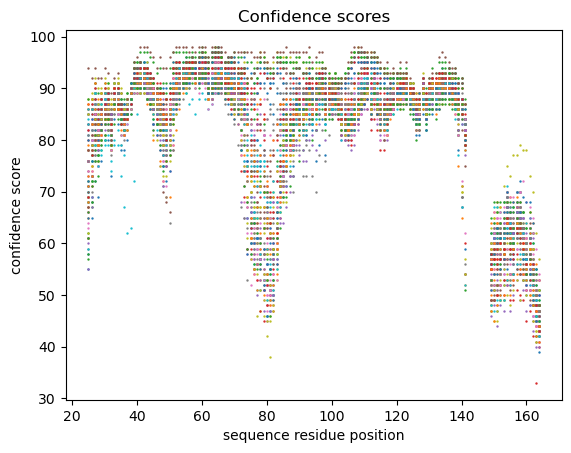

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#print(list_scores)
#print(list_matched_ids)

more_80 = []
more_80_rmsd = []
plt.figure()

index = len(list_scores)
for i in range(index):
    #plt.figure()
    #plt.scatter(np.array(list_matched_ids[i]), np.array(list_scores[i]))
    #label = 'Confidence scores for ' + str(int(i))
    #plt.title(label)
    #plt.show()
    mean_conf = sum(list_scores[i])/len(list_scores[i])
    if mean_conf > 80:
        more_80_rmsd.append(list_rmsd[i])
        more_80.append(mean_conf)
        list = np.asarray(list_matched_ids[i]) + 13
        plt.scatter(list, list_scores[i], s=0.5)

print(more_80)
print(len(more_80))
plt.xlabel('sequence residue position')
plt.ylabel('confidence score')
plt.title('Confidence scores')
plt.show()


Text(0.5, 0, 'RMSD value')

<Figure size 640x480 with 0 Axes>

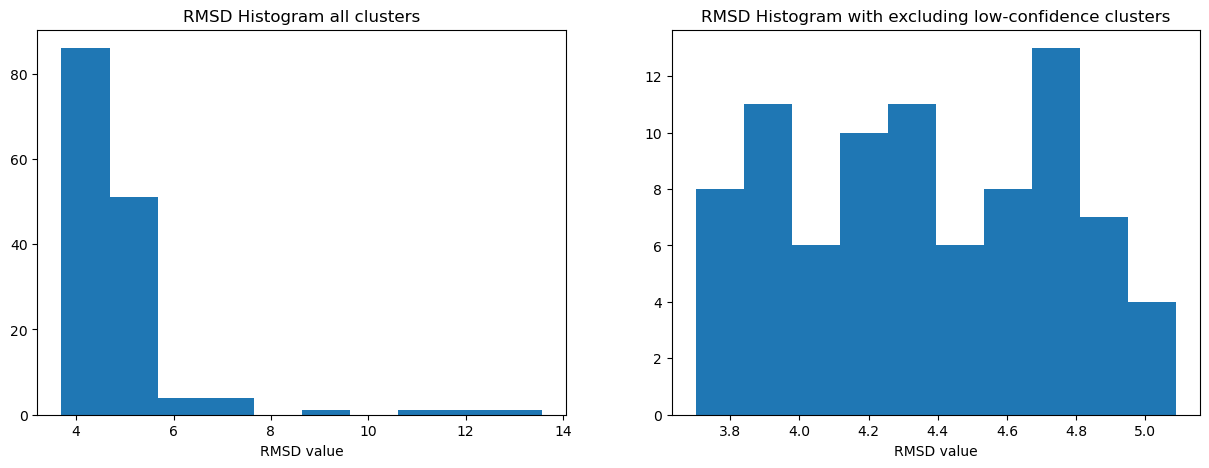

In [4]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(list_rmsd)
ax[0].set_title('RMSD Histogram all clusters')
ax[0].set_xlabel('RMSD value')

ax[1].hist(more_80_rmsd)
ax[1].set_title('RMSD Histogram with excluding low-confidence clusters')
ax[1].set_xlabel('RMSD value')



### Only the LOV domain extracted  

Now, we perform the same function but only on the LOV domain of the sequence. This means that the RMSD comparing the structures of our clusters is computed only on the LOV domain, which is the region of interest in our problem. 

In [5]:
from run_comparisson_for_AF_cluster_modified import *

parent_folder_path = '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2'
original_pdb_file = "/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A.pdb"
#parent_folder_path = '/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/output'
#original_pdb_file = "/Users/marijazelic/github-classroom/CS-433/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb"
choose_contigs = "without low-confidenceLOV" # "without low-confidenceLOV", "whole_protein"
list_scores, list_matched_ids, list_rmsd, list_sequences, cluster_ids = run_alignments_on_subfolders(parent_folder_path, original_pdb_file, choose_contigs, None)

/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_051_sorted_sorted.pdb
RMSD: 2.183
Mean confindence AF: 81.658
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_056
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_056_sorted.pdb
RMSD: 1.914
Mean confindence AF: 92.149
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_069
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_069_sorted.pdb
RMSD: 3.625
Mean confindence AF: 82.596
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_060
Sorted PDB file saved as: /Users/sarazatezalo/Docume

[81.65789473684211, 92.14912280701755, 82.59649122807018, 83.17543859649123, 92.32456140350877, 86.09649122807018, 81.28947368421052, 84.42105263157895, 80.83333333333333, 82.7719298245614, 83.19298245614036, 84.20175438596492, 89.45614035087719, 85.7719298245614, 92.7280701754386, 85.7280701754386, 84.60526315789474, 88.46491228070175, 83.74561403508773, 88.1842105263158, 83.95614035087719, 84.7719298245614, 86.63157894736842, 81.29824561403508, 84.12280701754386, 82.29824561403508, 83.42105263157895, 82.23684210526316, 82.00877192982456, 85.64035087719299, 84.7280701754386, 80.1842105263158, 85.21052631578948, 86.2280701754386, 85.80701754385964, 85.93859649122807, 83.4298245614035, 85.42105263157895, 81.08771929824562, 83.48245614035088, 85.5, 82.17543859649123, 84.89473684210526, 82.51754385964912, 87.35087719298245, 84.93859649122807, 83.21052631578948, 94.09649122807018, 91.40350877192982, 82.5701754385965, 85.59649122807018, 88.30701754385964, 84.44736842105263, 85.2719298245614

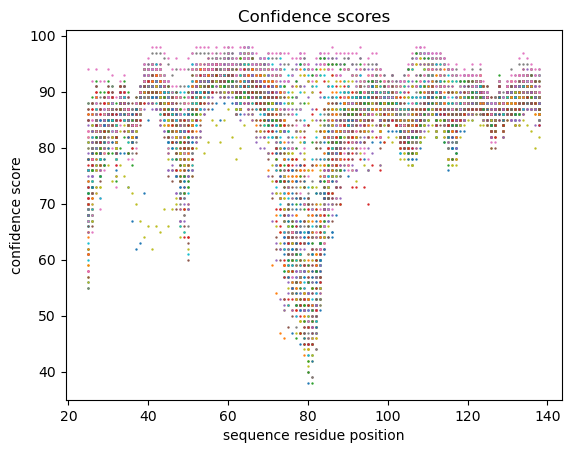

In [6]:
import matplotlib.pyplot as plt
more_80 = []
more_80_rmsd = []
more_80_clusters = []
plt.figure()

index = len(list_scores)
for i in range(index):
    #plt.figure()
    #plt.scatter(np.array(list_matched_ids[i]), np.array(list_scores[i]))
    #label = 'Confidence scores for ' + str(int(i))
    #plt.title(label)
    #plt.show()
    mean_conf = sum(list_scores[i])/len(list_scores[i])
    if mean_conf > 80:
        more_80_rmsd.append(list_rmsd[i])
        more_80.append(mean_conf)
        list = np.asarray(list_matched_ids[i]) + 13
        plt.scatter(list, list_scores[i], s=0.5)
        more_80_clusters.append(cluster_ids[i])

print(more_80)
print(len(more_80_clusters))
print(len(more_80_rmsd))
plt.xlabel('sequence residue position')
plt.ylabel('confidence score')
plt.title('Confidence scores')
plt.show()


Text(0.5, 0, 'RMSD value')

<Figure size 640x480 with 0 Axes>

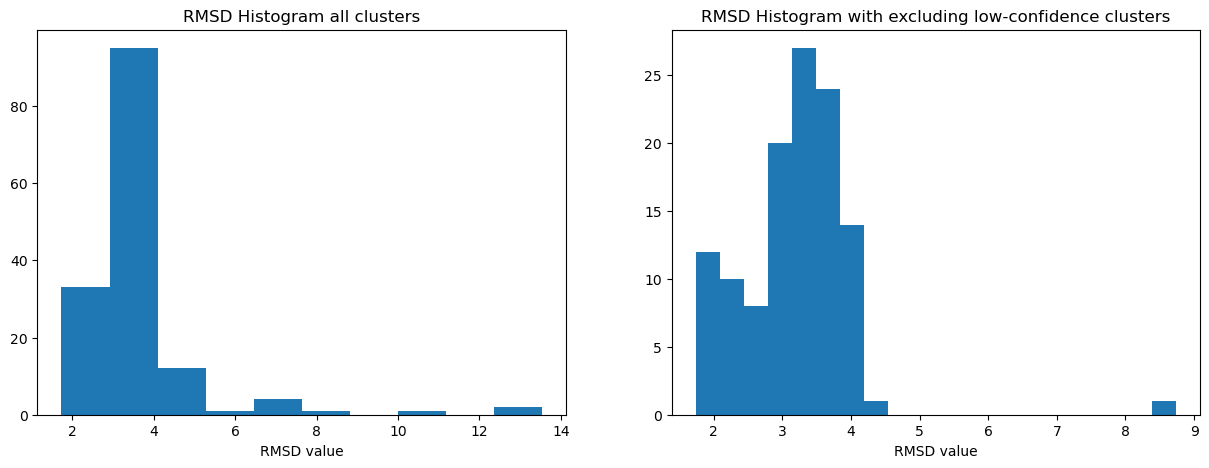

In [7]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(list_rmsd)
ax[0].set_title('RMSD Histogram all clusters')
ax[0].set_xlabel('RMSD value')

ax[1].hist(more_80_rmsd, 20)
ax[1].set_title('RMSD Histogram with excluding low-confidence clusters')
ax[1].set_xlabel('RMSD value')

### Working with the last histogram to obtain a threashold for separating two lobes

Using only the clusters in whose predicted structure Alpha Fold is confident over 80%, the idea is to now try to separate them in ones that resemble more the OFF or ON conformation, depending on their RMSD value. Since the ground truth chain corresponds to the OFF conformation, we consider the conformations that have a lower RMSD as OFF, and the others as ON. As we can see from the histogram, our conformations clearly form two lobes, so, we will now opt to find an optimal separating threshold of the two. For this, we use the Otsu method to compute the optimal threshold:  https://medium.com/geekculture/image-thresholding-from-scratch-a66ae0fb6f09.

Text(0.5, 0, 'RMSD value')

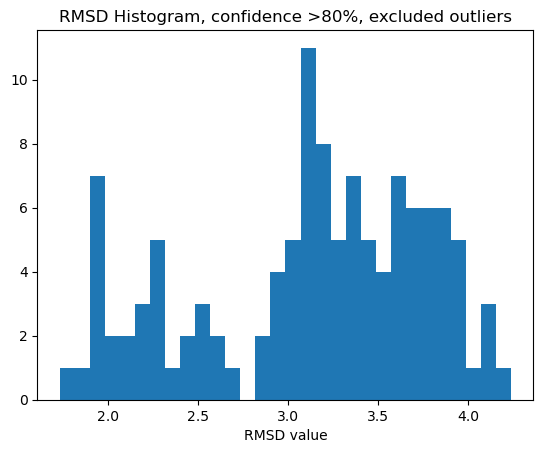

In [8]:
# Getting rid of the outliers
nonoutlier_idx = np.argwhere(np.asarray(more_80_rmsd)<7)
nonoutlier_idx = np.reshape(nonoutlier_idx, (len(nonoutlier_idx),))
rmsd_filtered = np.asarray(more_80_rmsd)
rmsd_filtered = rmsd_filtered[nonoutlier_idx]

plt.figure()
plt.hist(rmsd_filtered, 30)
plt.title('RMSD Histogram, confidence >80%, excluded outliers')
plt.xlabel('RMSD value')

Optimal threshold value: 3


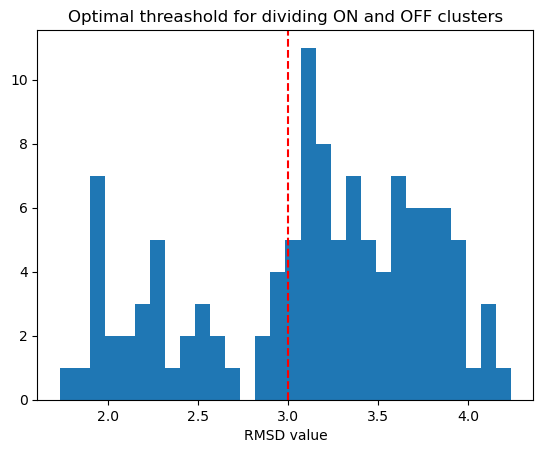

In [9]:
# Finding the threashold with the otsu method

def _compute_otsu_criteria(x, th):
    # create the thresholded image
    thresholded_im = np.zeros(x.shape)
    thresholded_im[x >= th] = 1

    # compute weights
    nb_pixels = x.size
    nb_pixels1 = np.count_nonzero(thresholded_im)
    weight1 = nb_pixels1 / nb_pixels
    weight0 = 1 - weight1

    # if one of the classes is empty, eg all pixels are below or above the threshold, that threshold will not be considered
    # in the search for the best threshold
    if weight1 == 0 or weight0 == 0:
        return np.inf

    # find all pixels belonging to each class
    val_clusters1 = x[thresholded_im == 1]
    val_clusters0 = x[thresholded_im == 0]

    # compute variance of these classes
    var1 = np.var(val_clusters1) if len(val_clusters1) > 0 else 0
    var0 = np.var(val_clusters0) if len(val_clusters0) > 0 else 0

    return weight0 * var0 + weight1 * var1

def otsuThreshold(x):
    threshold_range = range(np.ceil(np.max(x)).astype(int))
    criterias = np.array([_compute_otsu_criteria(x, th) for th in threshold_range])

    # best threshold is the one minimizing the Otsu criteria
    best_threshold = threshold_range[np.argmin(criterias)]

    return best_threshold


threshold_value = otsuThreshold(rmsd_filtered)
print("Optimal threshold value:", threshold_value)

plt.figure()
plt.hist(rmsd_filtered, 30)
plt.title('Optimal threashold for dividing ON and OFF clusters')
plt.xlabel('RMSD value')
plt.axvline(threshold_value, color='r', linestyle='--')


As we can clearly see, the optimal value is 3, so we will consider value that in further separation of clusters into ON and OFF conformations.

### Repeated procedure for RMSD only on Gln (position 138), and other relevant residues from the LOV domain  

As stated in https://www.science.org/doi/10.1126/science.1137128, there are some residues that are known to shift upon light absorption, that is, when the conformation changes from the OFF to the ON state. To squeeze out the useful information from the RMSD in order to discriminate between the two states, we compute the RMSD only on those residues, but the alignment is still obtained by considering the whole LOV domain.  
Here, we test a few different combinations of residues to compute the RMSD with, in order to find the one that separates the two lobes the best. Refer to the 'CompareTwoPDBs_specific' function in the 'main_tools.py' to check out different combinations. The one that we found works the best, is the "small_subset4", which consists of residues on positions 93, 108 and 138, and we work with that one further.



In [10]:
parent_folder_path = '/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2'
original_pdb_file = "/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A.pdb"
choose_contigs = "without low-confidenceLOV"  #"without low-confidenceLOV", "whole_protein"
list_scores, list_matched_ids, list_specific_rmsd, list_sequences, cluster_ids_specific = run_alignments_on_subfolders(parent_folder_path, original_pdb_file, choose_contigs, 'small_subset4')

/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_051
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_051_sorted_sorted.pdb
RMSD: 1.770
Mean confindence AF: 81.658
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_056
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_056_sorted.pdb
RMSD: 1.444
Mean confindence AF: 92.149
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_069
Sorted PDB file saved as: /Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/EL222_chain_A_sorted.pdb
Sorted PDB file saved as: EX_069_sorted.pdb
RMSD: 2.600
Mean confindence AF: 82.596
/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/output2/EX_060
Sorted PDB file saved as: /Users/sarazatezalo/Docume

[81.65789473684211, 92.14912280701755, 82.59649122807018, 83.17543859649123, 92.32456140350877, 86.09649122807018, 81.28947368421052, 84.42105263157895, 80.83333333333333, 82.7719298245614, 83.19298245614036, 84.20175438596492, 89.45614035087719, 85.7719298245614, 92.7280701754386, 85.7280701754386, 84.60526315789474, 88.46491228070175, 83.74561403508773, 88.1842105263158, 83.95614035087719, 84.7719298245614, 86.63157894736842, 81.29824561403508, 84.12280701754386, 82.29824561403508, 83.42105263157895, 82.23684210526316, 82.00877192982456, 85.64035087719299, 84.7280701754386, 80.1842105263158, 85.21052631578948, 86.2280701754386, 85.80701754385964, 85.93859649122807, 83.4298245614035, 85.42105263157895, 81.08771929824562, 83.48245614035088, 85.5, 82.17543859649123, 84.89473684210526, 82.51754385964912, 87.35087719298245, 84.93859649122807, 83.21052631578948, 94.09649122807018, 91.40350877192982, 82.5701754385965, 85.59649122807018, 88.30701754385964, 84.44736842105263, 85.2719298245614

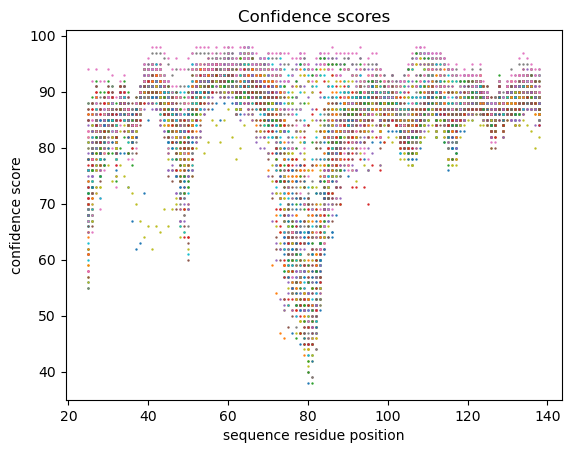

In [11]:
more_80 = []
more_80_rmsd_specific = []
more_80_clusters_specific = []
more_80_confidences = []
plt.figure()

index = len(list_scores)
for i in range(index):
    #plt.figure()
    #plt.scatter(np.array(list_matched_ids[i]), np.array(list_scores[i]))
    #label = 'Confidence scores for ' + str(int(i))
    #plt.title(label)
    #plt.show()
    mean_conf = sum(list_scores[i])/len(list_scores[i])
    if mean_conf > 80:
        more_80_rmsd_specific.append(list_specific_rmsd[i])
        more_80.append(mean_conf)
        list = np.asarray(list_matched_ids[i]) + 13
        more_80_clusters_specific.append(cluster_ids_specific[i])
        more_80_confidences.append(list_scores[i])
        plt.scatter(list, list_scores[i], s=0.5)

print(more_80)
print(len(more_80_rmsd_specific))
print(len(more_80_confidences))
plt.title('Confidence scores')
plt.xlabel('sequence residue position')
plt.ylabel('confidence score')
plt.show()

Text(0.5, 0, 'RMSD value')

<Figure size 640x480 with 0 Axes>

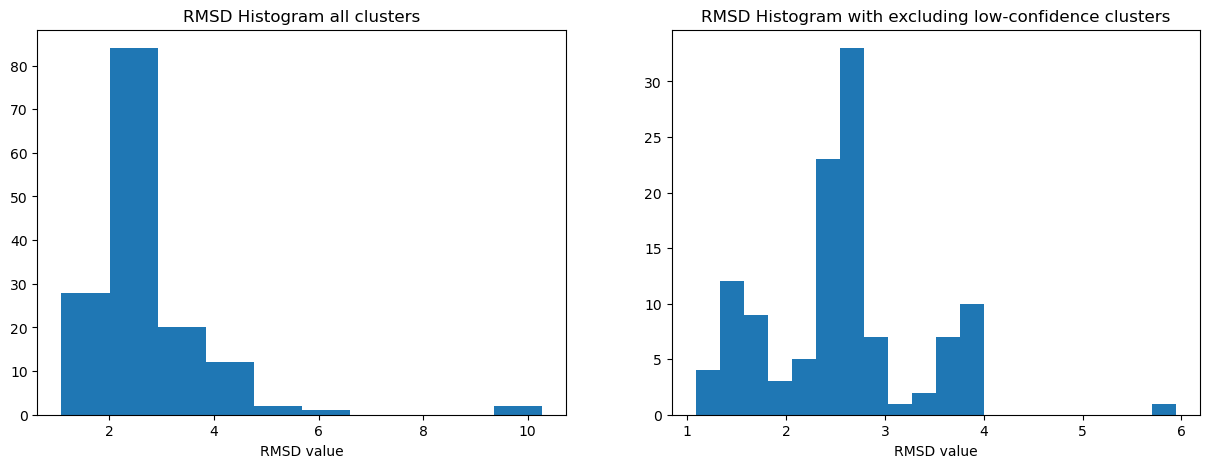

In [12]:
plt.figure()
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(list_specific_rmsd)
ax[0].set_title('RMSD Histogram all clusters')
ax[0].set_xlabel('RMSD value')

ax[1].hist(more_80_rmsd_specific, 20)
ax[1].set_title('RMSD Histogram with excluding low-confidence clusters')
ax[1].set_xlabel('RMSD value')

Text(0.5, 0, 'RMSD value')

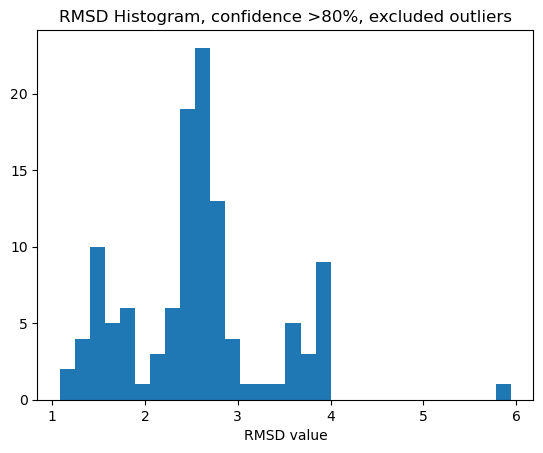

In [13]:
# Getting rid of the outliers
nonoutlier_idx = np.argwhere(np.asarray(more_80_rmsd_specific)<7)
nonoutlier_idx = np.reshape(nonoutlier_idx, (len(nonoutlier_idx),))
rmsd_specific_filtered = np.asarray(more_80_rmsd_specific)
rmsd_specific_filtered = rmsd_specific_filtered[nonoutlier_idx]

plt.figure()
plt.hist(rmsd_specific_filtered, 30)
plt.title('RMSD Histogram, confidence >80%, excluded outliers')
plt.xlabel('RMSD value')

Optimal threshold value: 3


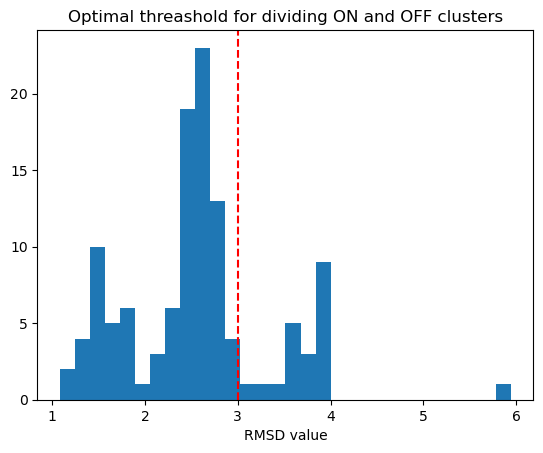

In [14]:
threshold_value = otsuThreshold(rmsd_specific_filtered)
print("Optimal threshold value:", threshold_value)

plt.figure()
plt.hist(rmsd_specific_filtered, 30)
plt.title('Optimal threashold for dividing ON and OFF clusters')
plt.xlabel('RMSD value')
plt.axvline(threshold_value, color='r', linestyle='--')

### Combining the values of RMSD of the whole sequence and specific AA into one plot 

In order to check whether the clustering makes sense for both of the approaches of computing the RMSD, we plot them together on a 2D plot.


117
117


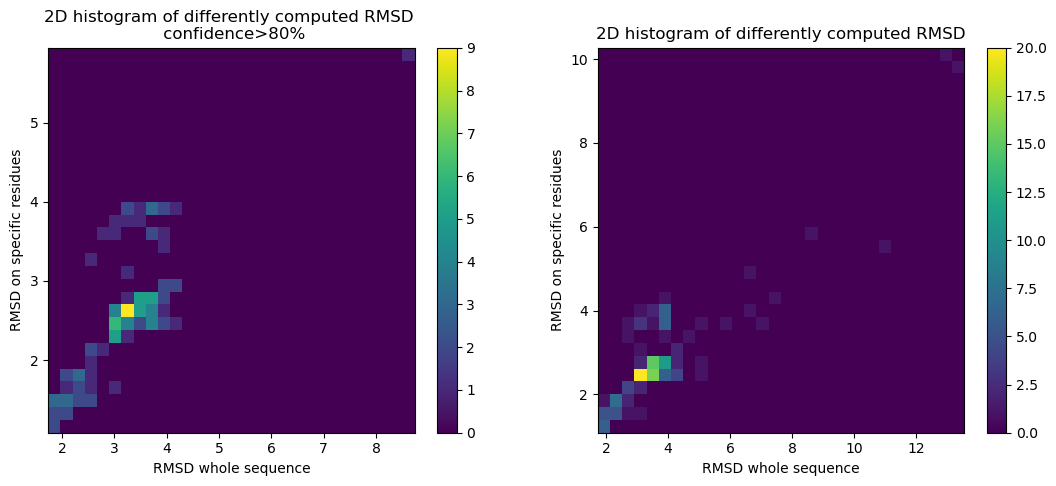

In [15]:
print(len(more_80_rmsd))
print(len(more_80_rmsd_specific))

fig, ax = plt.subplots(1,2, figsize=(13,5))
pcm = ax[0].hist2d(more_80_rmsd, more_80_rmsd_specific, 30)
ax[0].set_title('2D histogram of differently computed RMSD \n confidence>80%')
ax[0].set_xlabel('RMSD whole sequence')
ax[0].set_ylabel('RMSD on specific residues')
fig.colorbar(pcm[3], ax=ax[0])

im = ax[1].hist2d(list_rmsd, list_specific_rmsd, 30)
ax[1].set_title('2D histogram of differently computed RMSD')
ax[1].set_xlabel('RMSD whole sequence')
ax[1].set_ylabel('RMSD on specific residues')
fig.colorbar(im[3], ax=ax[1])


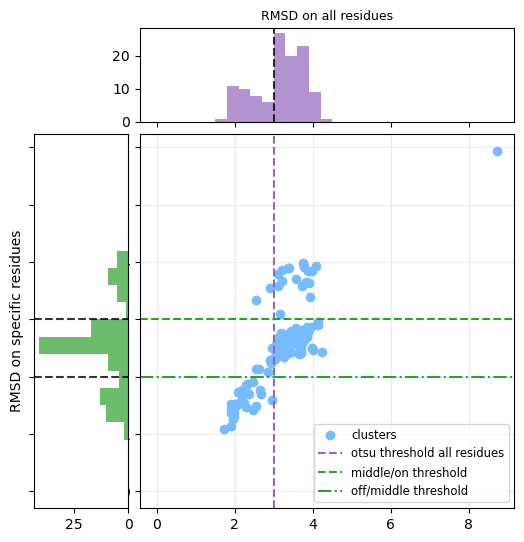

In [16]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.grid(alpha=0.25)
    ax.scatter(x, y, color="xkcd:sky blue", label="clusters")
    ax.axvline(3, color='tab:purple',linestyle='--',label='otsu threshold all residues')
    ax.axhline(3, color='tab:green',linestyle='--',label='middle/on threshold')        
    ax.axhline(2, color='tab:green',linestyle='dashdot',label='off/middle threshold')
    ax.legend(loc='lower right', fontsize='small')
    # now determine nice limits by hand:
    binwidth = 0.3
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(0, 6, binwidth)
    ax_histx.hist(x, bins=bins, color='tab:purple',alpha=0.7)
    ax_histx.axvline(3,color='k', linestyle='--',alpha=0.8)
    ax_histy.hist(y, bins=bins, orientation='horizontal', color='tab:green',alpha=0.7)
    ax_histy.axhline(3,color='k', linestyle='--',alpha=0.8)
    ax_histy.axhline(2,color='k', linestyle='--',alpha=0.8)


# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2, width_ratios=(1, 4), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 1])
ax_histx = fig.add_subplot(gs[0, 1], sharex=ax)
ax_histx.set_title('RMSD on all residues',fontsize=9)
ax_histy = fig.add_subplot(gs[1, 0], sharey=ax)
ax_histy.set_ylabel('RMSD on specific residues')
ax_histy.invert_xaxis()
# Draw the scatter plot and marginals.
scatter_hist(more_80_rmsd, more_80_rmsd_specific, ax, ax_histx, ax_histy)

### Identifying ON and OFF mutations based on the histogram  

Now that we have found the threshold between two states on RMSD, we have to see which mutations induce those changes between the states, so we extract the clusters that correspond to the ON and OFF states.

In [17]:
# Extracting clusters below and above threshold
# Clusters with RMSD below the threshold are considered OFF
# Conversly, clusters with RMSD above the threshold are considered ON

more_80_rmsd = np.asarray(more_80_rmsd)
cluster_ids = np.asarray(more_80_clusters)
off_cluster_ids = np.argwhere(np.asarray(more_80_rmsd)<3)
off_clusters = cluster_ids[off_cluster_ids]
# Indexes of OFF clusters
off_clusters = off_clusters.flatten()

on_cluster_ids = np.argwhere(np.asarray(more_80_rmsd)>=3)
on_clusters = cluster_ids[on_cluster_ids]
# Indexes of ON clusters
on_clusters = on_clusters.flatten()

rmsd_values_off = more_80_rmsd[off_cluster_ids].flatten()
rmsd_values_on = more_80_rmsd[on_cluster_ids].flatten()

#-------- Clusters with RMSD calculated on specific AAs -----------
more_80_rmsd_specific = np.asarray(more_80_rmsd_specific)
cluster_ids_specific = np.asarray(more_80_clusters_specific)

off_cluster_ids = np.argwhere(np.asarray(more_80_rmsd_specific)<2)
off_clusters_specific = cluster_ids_specific[off_cluster_ids]
# Indexes of OFF clusters
off_clusters_specific = off_clusters_specific.flatten()


on_cluster_ids = np.argwhere(np.asarray(more_80_rmsd_specific)>=3)
on_clusters_specific = cluster_ids_specific[on_cluster_ids]
# Indexes of ON clusters
on_clusters_specific = on_clusters_specific.flatten()


middle_cluster_ids = np.argwhere((np.asarray(more_80_rmsd_specific)>=2) & (np.asarray(more_80_rmsd_specific)<3))
middle_clusters_specific = cluster_ids_specific[middle_cluster_ids]
# Indexes of middle clusters
middle_clusters_specific = middle_clusters_specific.flatten()

# Intersecting the two sets of ON and OFF clusters
off_clusters = off_clusters.tolist()
on_clusters = on_clusters.tolist()
off_clusters_specific = off_clusters_specific.tolist()
on_clusters_specific = on_clusters_specific.tolist()
middle_clusters_specific = middle_clusters_specific.tolist()

def intersection(list1, list2):
    list = [value for value in list1 if value in list2]
    return list

on_final = intersection(on_clusters, on_clusters_specific)
off_final = intersection(off_clusters, off_clusters_specific)
middle_final = middle_clusters_specific#intersection(middle_clusters_specific, on_clusters)

print(on_final)
print(off_final)
print(middle_final)


[67, 2, 59, 125, 130, 100, 81, 11, 39, 55, 96, 129, 134, 49, 71, 47, 14, 79, 84]
[51, 56, 93, 68, 4, 147, 113, 114, 112, 139, 136, 10, 17, 28, 19, 44, 27, 20, 16, 80, 6, 99, 0, 116, 118, 133, 41, 70]
[69, 94, 33, 34, 66, 95, 50, 3, 32, 140, 122, 148, 141, 108, 109, 131, 107, 138, 26, 72, 86, 88, 43, 29, 45, 42, 87, 73, 8, 30, 52, 64, 63, 97, 7, 9, 36, 62, 65, 53, 98, 119, 126, 121, 128, 110, 144, 143, 111, 127, 145, 105, 102, 132, 103, 82, 76, 85, 40, 13, 25, 22, 48, 83, 23, 24, 12, 15]


### Checking the confidence for ON, OFF and "middle" clusters on the position Gln 138

In [18]:
# The position of Gln (138 in the original sequence) has the position of 138-13=125 in the list which is the last 114th residue in the list

on_cluster_ids = on_cluster_ids.reshape(len(on_cluster_ids,))
off_cluster_ids = off_cluster_ids.reshape(len(off_cluster_ids,))
middle_cluster_ids = middle_cluster_ids.reshape(len(middle_cluster_ids,))

# Getting the average confidence score of Gln 138 position for ON clusters 
avg_conf_on = 0
position_gln = 113
for ind, val in enumerate(on_cluster_ids):
    avg_conf_on += more_80_confidences[val][position_gln]
avg_conf_on /= len(on_cluster_ids)
print(f'Average ON confidence for the position of Gln 138 is: {avg_conf_on}')

# Getting the average confidence score of Gln 138 position for OFF clusters 
avg_conf_off = 0
for ind, val in enumerate(off_cluster_ids):
    avg_conf_off += more_80_confidences[val][position_gln]
avg_conf_off /= len(off_cluster_ids)
print(f'Average OFF confidence for the position of Gln 138 is: {avg_conf_off}')

# Getting the average confidence score of Gln 138 position for MIDDLE clusters 
avg_conf_middle = 0
for ind, val in enumerate(middle_cluster_ids):
    avg_conf_middle += more_80_confidences[val][position_gln]
avg_conf_middle /= len(middle_cluster_ids)
print(f'Average MIDDLE confidence for the position of Gln 138 is: {avg_conf_middle}')


Average ON confidence for the position of Gln 138 is: 86.19047619047619
Average OFF confidence for the position of Gln 138 is: 89.60714285714286
Average MIDDLE confidence for the position of Gln 138 is: 87.47058823529412


### If we want to extract only ON and OFF clusters 

In [20]:
# Extracting clusters below and above threshold
# Clusters with RMSD below the threshold are considered OFF
# Conversly, clusters with RMSD above the threshold are considered ON

more_80_rmsd = np.asarray(more_80_rmsd)
cluster_ids = np.asarray(more_80_clusters)
off_cluster_ids = np.argwhere(np.asarray(more_80_rmsd)<3)
off_clusters = cluster_ids[off_cluster_ids]
# Indexes of OFF clusters
off_clusters = off_clusters.flatten()

on_cluster_ids = np.argwhere(np.asarray(more_80_rmsd)>=3)
on_clusters = cluster_ids[on_cluster_ids]
# Indexes of ON clusters
on_clusters = on_clusters.flatten()

rmsd_values_off = more_80_rmsd[off_cluster_ids].flatten()
rmsd_values_on = more_80_rmsd[on_cluster_ids].flatten()

"""
#-------- Clusters with RMSD calculated on specific AAs -----------
more_80_rmsd_specific = np.asarray(more_80_rmsd_specific)
cluster_ids_specific = np.asarray(more_80_clusters_specific)

off_cluster_ids = np.argwhere(np.asarray(more_80_rmsd_specific)<2)
off_clusters_specific = cluster_ids_specific[off_cluster_ids]
# Indexes of OFF clusters
off_clusters_specific = off_clusters_specific.flatten()


on_cluster_ids = np.argwhere(np.asarray(more_80_rmsd_specific)>=3)
on_clusters_specific = cluster_ids_specific[on_cluster_ids]
# Indexes of ON clusters
on_clusters_specific = on_clusters_specific.flatten()

# Intersecting the two sets of ON and OFF clusters
off_clusters = off_clusters.tolist()
on_clusters = on_clusters.tolist()
off_clusters_specific = off_clusters_specific.tolist()
on_clusters_specific = on_clusters_specific.tolist()

def intersection(list1, list2):
    list = [value for value in list1 if value in list2]
    return list

on_final = intersection(on_clusters, on_clusters_specific)
off_final = intersection(off_clusters, off_clusters_specific)
"""
print(len(on_clusters))
print(len(off_clusters))
print(len(cluster_ids))
print(len(on_clusters)+len(off_clusters))



81
36
117
117


### Generating files that contain sequences of ON and OFF clusters to use in further analysis

In [19]:
# Consenzus sequences for OFF state
from utils import *

consenzus_sequences_off =  generate_consensus_sequences_for_each_cluster(off_final)
consenzus_sequences_on = generate_consensus_sequences_for_each_cluster(on_final)

all_sequences_off = collect_sequences_from_clusters(off_final)
all_sequences_on = collect_sequences_from_clusters(on_final)
all_sequences = all_sequences_off + all_sequences_on

In [20]:
# Write consenzus sequences to separate files

with open('/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/final_onoff_sequences/off_sequences.txt', 'w') as f:
    for line in consenzus_sequences_off:
        f.write(f"{line}\n")
        
with open('/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/final_onoff_sequences/on_sequences.txt', 'w') as f:
    for line in consenzus_sequences_on:
        f.write(f"{line}\n")
        
# Write all sequences to separate files
with open('/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/final_onoff_sequences/all_off_sequences.txt', 'w') as f:
    for line in all_sequences_off:
        f.write(f"{line}\n")

with open('/Users/sarazatezalo/Documents/EPFL/semester 1/ml-project-2-girl-mse/final_onoff_sequences/all_on_sequences.txt', 'w') as f:
    for line in all_sequences_on:
        f.write(f"{line}\n")